# Introduction
In Part III, we asked several business-related questions and performed DataFrame manipulation to get the answers that we wanted. 

Next up, in this Part, we will:
1. Dummify categorical columns 
2. Combine the DataFrames containing the dummified categorical columns
3. Export the final DataFrame for model training

We'll be dummifying the categorical columns and we will assume that the number of centers or their ids do not change over time.

### Step 1: Import library
Import pandas to get started.

In [2]:
# Step 1: Import pandas
import pandas as pd
from functools import reduce

### Step 2: Read the CSV from Part III as DataFrame
Let's read the CSV that we got from Part III. We anticipate:
1. 456,548 rows
2. 18 columns

In [3]:
# Step 2: Read the CSV from Part III
raw_df = pd.read_csv('engineered_data.csv')
raw_df.shape

(456548, 18)

## Dummifying categorical columns
In this Section, we will select certain columns to dummify. 

The values found in some of the categorical columns are purely numerical so we have to isolate them first. For example, we will have to dummify center_id even though the values are numbers.

Don't worry, just let pandas handle all of the dummification.

### Step 3: Dummify center_id
Get the dummies from the center_id column. A few things to note:
1. Use center_id as the prefix
2. Don't drop any columns

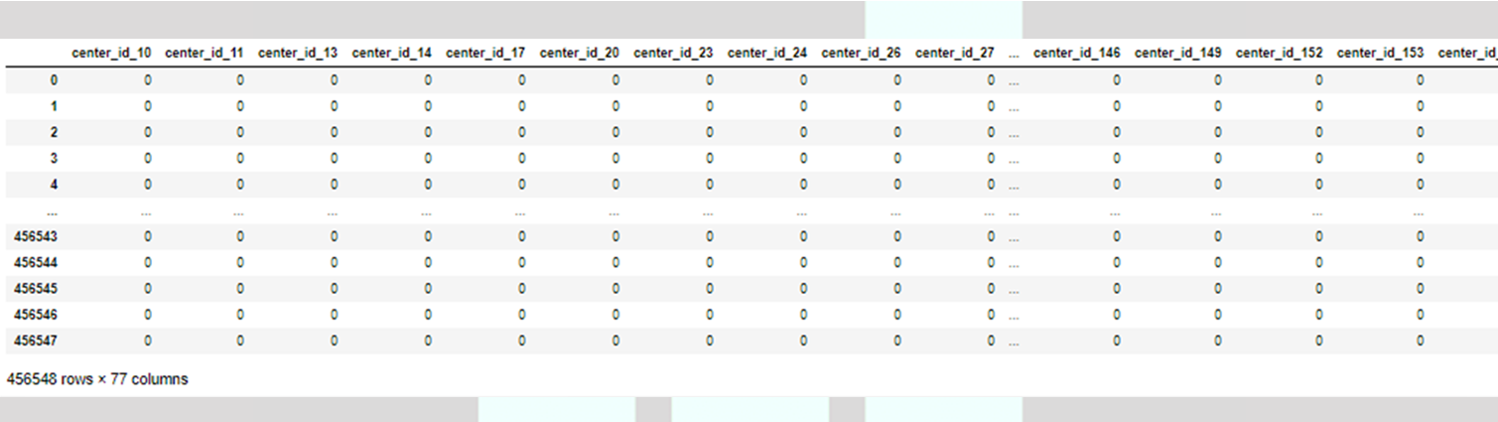

There will be 77 columns for this dummified column.

In [4]:
# Step 3: Dummify center_id
ctr_id_df = pd.get_dummies(raw_df['center_id'],prefix='center_id_')
ctr_id_df

,center_id__10,center_id__11,center_id__13,center_id__14,center_id__17,center_id__20,center_id__23,center_id__24,center_id__26,center_id__27,...,center_id__146,center_id__149,center_id__152,center_id__153,center_id__157,center_id__161,center_id__162,center_id__174,center_id__177,center_id__186
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
456544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
456545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
456546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step 4: Dummify meal_id
Next, dummify meal_id and use "meal_id" as the prefix.

You'll get a DataFrame with 51 columns.

In [5]:
# Step 4: Dummify meal_id
meal_id_df = pd.get_dummies(raw_df['meal_id'],prefix='meal_id_')
meal_id_df

,meal_id__1062,meal_id__1109,meal_id__1198,meal_id__1207,meal_id__1216,meal_id__1230,meal_id__1247,meal_id__1248,meal_id__1311,meal_id__1438,...,meal_id__2581,meal_id__2631,meal_id__2640,meal_id__2664,meal_id__2704,meal_id__2707,meal_id__2760,meal_id__2826,meal_id__2867,meal_id__2956
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
456544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
456545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
456546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step 5: Dummify city_code
Time to dummify city_code. Use "city_code" as the prefix.

You will get a DataFrame with 51 columns.

In [6]:
# Step 5: Dummify city_code
city_code_df = pd.get_dummies(raw_df['city_code'],prefix='city_code_')
city_code_df

,city_code__456,city_code__461,city_code__473,city_code__478,city_code__485,city_code__515,city_code__517,city_code__522,city_code__526,city_code__541,...,city_code__683,city_code__685,city_code__693,city_code__695,city_code__698,city_code__699,city_code__700,city_code__702,city_code__703,city_code__713
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
456544,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
456545,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
456546,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step 6: Dummify region_code
Expect 8 columns after dummifying region_code, with the prefix "region_code".

In [7]:
# Step 6: Dummify region_code
region_code_df = pd.get_dummies(raw_df['region_code'],prefix='region_code_')
region_code_df

,region_code__23,region_code__34,region_code__35,region_code__56,region_code__71,region_code__77,region_code__85,region_code__93
0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
456543,0,0,0,0,0,1,0,0
456544,0,0,0,0,0,1,0,0
456545,0,0,0,0,0,1,0,0
456546,0,0,0,0,0,1,0,0


### Step 7: Dummify center_type
Next up - center_type. We don't need any prefixes for this.

You'll end up with 3 columns.

In [8]:
# Step 7: Dummify center_type
ctr_type_df = pd.get_dummies(raw_df['center_type'],prefix='CENTER_')
ctr_type_df

,CENTER__TYPE_A,CENTER__TYPE_B,CENTER__TYPE_C
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
456543,1,0,0
456544,1,0,0
456545,1,0,0
456546,1,0,0


### Step 8: Dummify category
We'll dummify the category of the orders next. 

Similarly, there's no need for a prefix.

In [9]:
# Step 8: Dummify category
cat_df = pd.get_dummies(raw_df['category'])
cat_df

,Beverages,Biryani,Desert,Extras,Fish,Other Snacks,Pasta,Pizza,Rice Bowl,Salad,Sandwich,Seafood,Soup,Starters
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,0,0,0,0,1,0,0,0,0,0,0,0,0,0
456544,0,0,0,0,1,0,0,0,0,0,0,0,0,0
456545,0,0,0,0,1,0,0,0,0,0,0,0,0,0
456546,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### Step 9: Dummify cuisine
Last but not least, let's dummify cuisine. No need prefixes for this either.

In [10]:
# Step 9: Dummify cuisine
cuisines_df = pd.get_dummies(raw_df['cuisine'])
cuisines_df

,Continental,Indian,Italian,Thai
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
456543,1,0,0,0
456544,1,0,0,0
456545,1,0,0,0
456546,1,0,0,0


### Step 10: Putting it all together
Concatenate your:
1. original DataFrame
2. center_id dummy
3. meal_id dummy
4. city_code dummy
5. region_code dummy
6. center_type dummy
7. category dummy
8. cuisine dummy

into a single massive DataFrame. 

You'll end up with:
1. 456,548 rows
2. 226 columns

In [11]:
# Step 10: Combine all of your DataFrames together
#Will use pd merge function as it is most versatile vs join / concat
df_list = [raw_df,ctr_id_df,meal_id_df,city_code_df,region_code_df,ctr_type_df,cat_df,cuisines_df]

joined_df = reduce(lambda left,right: left.join(other=right,how='outer'), df_list) 

joined_df.shape

(456548, 226)

### Step 11: Drop columns
Before we export the DataFrame, let's drop the following columns:
1. id
2. center_id
3. meal_id
4. city_code
5. region_code
6. center_type
7. category
8. cuisine

We'll end up with 218 columns.

In [12]:
# Step 11: Drop the columns
joined_df.head(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,Rice Bowl,Salad,Sandwich,Seafood,Soup,Starters,Continental,Indian,Italian,Thai
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,0,0,0,0,0,0,0,0,0,1
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,...,0,0,0,0,0,0,0,0,0,1


In [13]:
# Step 11: Drop the columns
joined_df.drop(['id','center_id','meal_id','city_code','region_code','center_type','category','cuisine'],axis=1, inplace=True)
joined_df.head(2)

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,total_revenue,discounts,has_promotions,...,Rice Bowl,Salad,Sandwich,Seafood,Soup,Starters,Continental,Indian,Italian,Thai
0,1,136.83,152.29,0,0,177,2.0,24218.91,15.46,0,...,0,0,0,0,0,0,0,0,0,1
1,2,135.83,152.29,0,0,323,2.0,43873.09,16.46,0,...,0,0,0,0,0,0,0,0,0,1


### Step 12: Export DataFrame as CSV
All right - time to export the DataFrame as a CSV for the next Part.

Warning - this may take a while because your eventual CSV will be around 200MB.

In [14]:
# Step 12: Export DataFrame as CSV
joined_df.to_csv('dummified_data.csv',index=False)